In [130]:
import numpy as np
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearnex import patch_sklearn, config_context
patch_sklearn()
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import plotly.express as px


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [131]:
past = 'DataSet/Final/DataSet2017_2021.csv'
df = pd.read_csv(past, delimiter = ';',  low_memory=False, encoding='UTF-8', index_col = False)

In [132]:
df1 = df[df['ano'] == 2018]

In [133]:
#df2 = df[['uf','causa_acidente', 'tipo_acidente', 'classificacao_acidente', 'sentido_via', 'condicao_metereologica', 'tipo_pista', 'tracado_via','uso_solo', 'latitude', 'longitude']]
df1 = df1[['uf', 'condicao_metereologica', 'tipo_pista', 'tracado_via','br', 'km']]

In [134]:
df1 = df1.reset_index(drop=True)
df3 = df1.copy()

In [135]:
le = preprocessing.LabelEncoder()
col = ['uf', 'condicao_metereologica', 'tipo_pista', 'tracado_via']
for i in col:
    df3[i] = le.fit_transform(df3[i])
    
#df3 = stats.zscore(df3)
#df3 = StandardScaler().fit_transform(df3)
#df3 = pd.DataFrame(df3, columns = df1.columns)
df3

,uf,condicao_metereologica,tipo_pista,tracado_via,br,km
0,15,6,1,5,116,303.5
1,19,0,0,5,282,0.4
2,15,6,2,0,493,1.0
3,18,0,2,2,386,134.0
4,18,6,2,5,293,151.7
...,...,...,...,...,...,...
65933,0,0,0,0,101,73.8
65934,13,7,2,5,343,263.1
65935,2,4,2,5,101,321.0
65936,21,6,0,5,116,529.0


In [136]:
#df3 = StandardScaler().fit_transform(df3)
#df3 = pd.DataFrame(df3, columns = df1.columns)
#df3

In [145]:
cluster = range(2,100)
WCSSKMeans = []
WCSSRandom = []
CHSKMeans = []
CHSRandom = []
for i in cluster:
    model = KMeans(n_clusters = i, init='k-means++', max_iter = 1000, random_state = 1)
    model.fit(df3)
    CHSKMeans.append(metrics.calinski_harabasz_score(df3, model.labels_))
    WCSSKMeans.append(model.inertia_)
    model = KMeans(n_clusters = i, init= 'random', max_iter = 1000, random_state = 1)
    model.fit(df3)
    CHSRandom.append(metrics.calinski_harabasz_score(df3, model.labels_))
    WCSSRandom.append(model.inertia_)
    
    
    print('Cluster com ' + str(i))

Cluster com 2
Cluster com 3
Cluster com 4
Cluster com 5
Cluster com 6
Cluster com 7
Cluster com 8
Cluster com 9
Cluster com 10
Cluster com 11
Cluster com 12
Cluster com 13
Cluster com 14
Cluster com 15
Cluster com 16
Cluster com 17
Cluster com 18
Cluster com 19
Cluster com 20
Cluster com 21
Cluster com 22
Cluster com 23
Cluster com 24
Cluster com 25
Cluster com 26
Cluster com 27
Cluster com 28
Cluster com 29
Cluster com 30
Cluster com 31
Cluster com 32
Cluster com 33
Cluster com 34
Cluster com 35
Cluster com 36
Cluster com 37
Cluster com 38
Cluster com 39
Cluster com 40
Cluster com 41
Cluster com 42
Cluster com 43
Cluster com 44
Cluster com 45
Cluster com 46
Cluster com 47
Cluster com 48
Cluster com 49
Cluster com 50
Cluster com 51
Cluster com 52
Cluster com 53
Cluster com 54
Cluster com 55
Cluster com 56
Cluster com 57
Cluster com 58
Cluster com 59
Cluster com 60
Cluster com 61
Cluster com 62
Cluster com 63
Cluster com 64
Cluster com 65
Cluster com 66
Cluster com 67
Cluster com 68
Clu

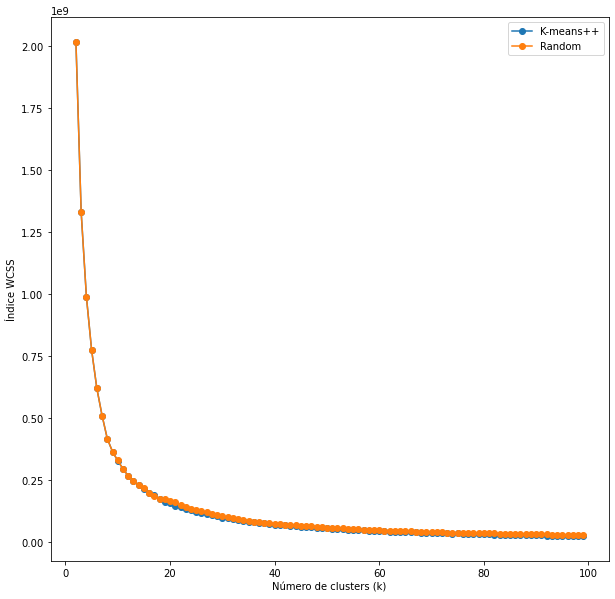

In [146]:
plt.figure(figsize= (10,10)) 
plt.plot(cluster, WCSSKMeans, marker = 'o') 
plt.plot(cluster, WCSSRandom, marker = 'o') 
plt.xlabel('Número de clusters (k)') 
plt.ylabel('Índice WCSS') 
plt.legend(['K-means++', 'Random'])
plt.show()

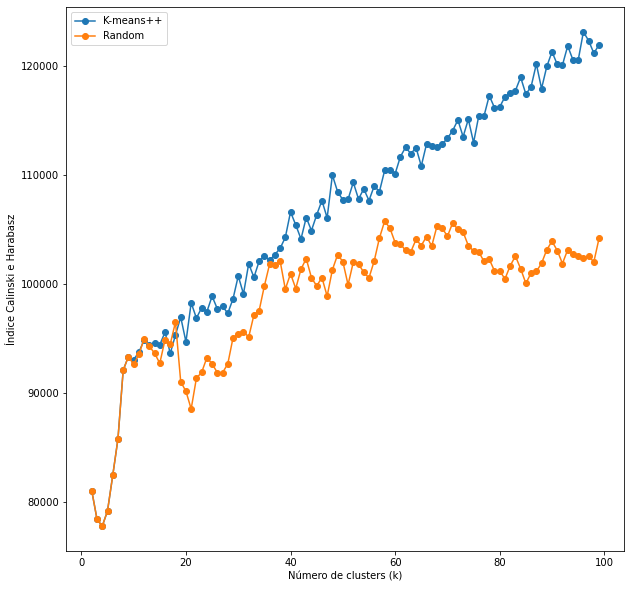

In [151]:
plt.figure(figsize= (10,10)) 
plt.plot(cluster, CHSKMeans, marker = 'o') 
plt.plot(cluster, CHSRandom, marker = 'o') 
plt.xlabel('Número de clusters (k)') 
plt.ylabel('Índice Calinski e Harabasz') 
plt.legend(['K-means++', 'Random'])
plt.show()

In [152]:
x1, y1 = 2, WCSSRandom[0]
x2, y2 = 100, WCSSRandom[len(WCSSRandom)-1]

distances = []
for i in range(len(WCSSRandom)):
    x0 = i+2
    y0 = WCSSRandom[i]
    numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
    denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
    distances.append(numerator/denominator)
    
n = distances.index(max(distances)) + 2
n

12

In [153]:
if max(max(CHSKMeans),max(CHSRandom)) == nKmeans:
    n = np.argmax(CHSKMeans)
else:
    n = np.argmax(CHSRandom)
n

56

In [142]:
max(CHSKMeans)

98873.93599704184

In [154]:
model = KMeans(n_clusters = 12, init='k-means++', max_iter = 100, random_state = 1)
model.fit_predict(df3)

array([11,  8,  9, ..., 11,  4,  7])

In [183]:
df1['cluster'] = model.labels_

In [206]:
dcluster = df1.groupby(['cluster']).size().reset_index(name='Frequency')
for i,a in enumerate(['uf', 'condicao_metereologica', 'tipo_pista', 'tracado_via','br', 'km']):
    dcluster[a] = model.cluster_centers_[:,i]
dcluster

,cluster,Frequency,uf,condicao_metereologica,tipo_pista,tracado_via,br,km
0,0,4333,11.541570,1.836490,1.613626,3.436490,310.060739,332.155797
1,1,8337,14.530152,2.107541,0.949287,3.985373,109.479679,185.192627
2,2,2432,6.185779,2.013152,1.581587,3.416769,112.643239,745.473818
3,3,4749,13.629427,1.949621,1.446669,3.714798,381.104975,202.802804
4,4,5445,9.072530,1.882483,1.127984,3.656078,104.106133,495.659144
5,5,11118,12.780775,1.994964,0.868807,3.788778,104.267242,64.873977
6,6,3836,10.530240,1.804223,0.827424,3.515641,329.290928,652.733681
7,7,4155,10.395427,1.886643,1.260650,3.569916,338.413718,488.636655
8,8,7924,12.423431,2.060220,1.022093,3.920717,271.843202,54.265055
9,9,5991,14.659383,2.077731,1.404003,3.805838,429.398999,68.871676


In [195]:
model

ValueError: Length of values (6) does not match length of index (12)

In [176]:
dfreuf = df1.groupby(['cluster', 'uf']).size().reset_index(name='Frequency')

In [177]:
df1.groupby(['cluster', 'traçado']).size().reset_index(name='Frequency')

,cluster,uf,Frequency
0,0,AL,50
1,0,BA,185
2,0,CE,110
3,0,GO,63
4,0,MA,190
5,0,MG,857
6,0,MS,156
7,0,MT,227
8,0,PA,24
9,0,PB,106


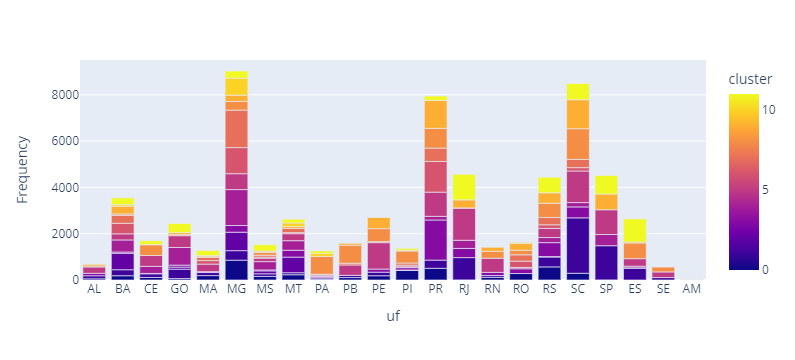

In [182]:
fig = px.bar(dfre, x ='uf', y = 'Frequency', color = 'cluster')
fig.show()

In [175]:
dfre['count'].max()

2394

In [ ]:
dfre[dfre['cluster'] == 0]

In [ ]:
model = AgglomerativeClustering()
model.fit(df3)


In [ ]:
model = GaussianMixture(n_components=12, random_state=0)
model.fit(df2)

In [ ]:
model = DBSCAN(eps=12, min_samples=9)
model.fit(df2)